<a href="https://colab.research.google.com/github/Mariyselita/CIP/blob/main/Tarea6_Iris_GNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
pip install ucimlrepo

In [24]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

In [25]:
iris

{'data': {'ids': None,
  'features':      sepal length  sepal width  petal length  petal width
  0             5.1          3.5           1.4          0.2
  1             4.9          3.0           1.4          0.2
  2             4.7          3.2           1.3          0.2
  3             4.6          3.1           1.5          0.2
  4             5.0          3.6           1.4          0.2
  ..            ...          ...           ...          ...
  145           6.7          3.0           5.2          2.3
  146           6.3          2.5           5.0          1.9
  147           6.5          3.0           5.2          2.0
  148           6.2          3.4           5.4          2.3
  149           5.9          3.0           5.1          1.8
  
  [150 rows x 4 columns],
  'targets':               class
  0       Iris-setosa
  1       Iris-setosa
  2       Iris-setosa
  3       Iris-setosa
  4       Iris-setosa
  ..              ...
  145  Iris-virginica
  146  Iris-virginica
  147  

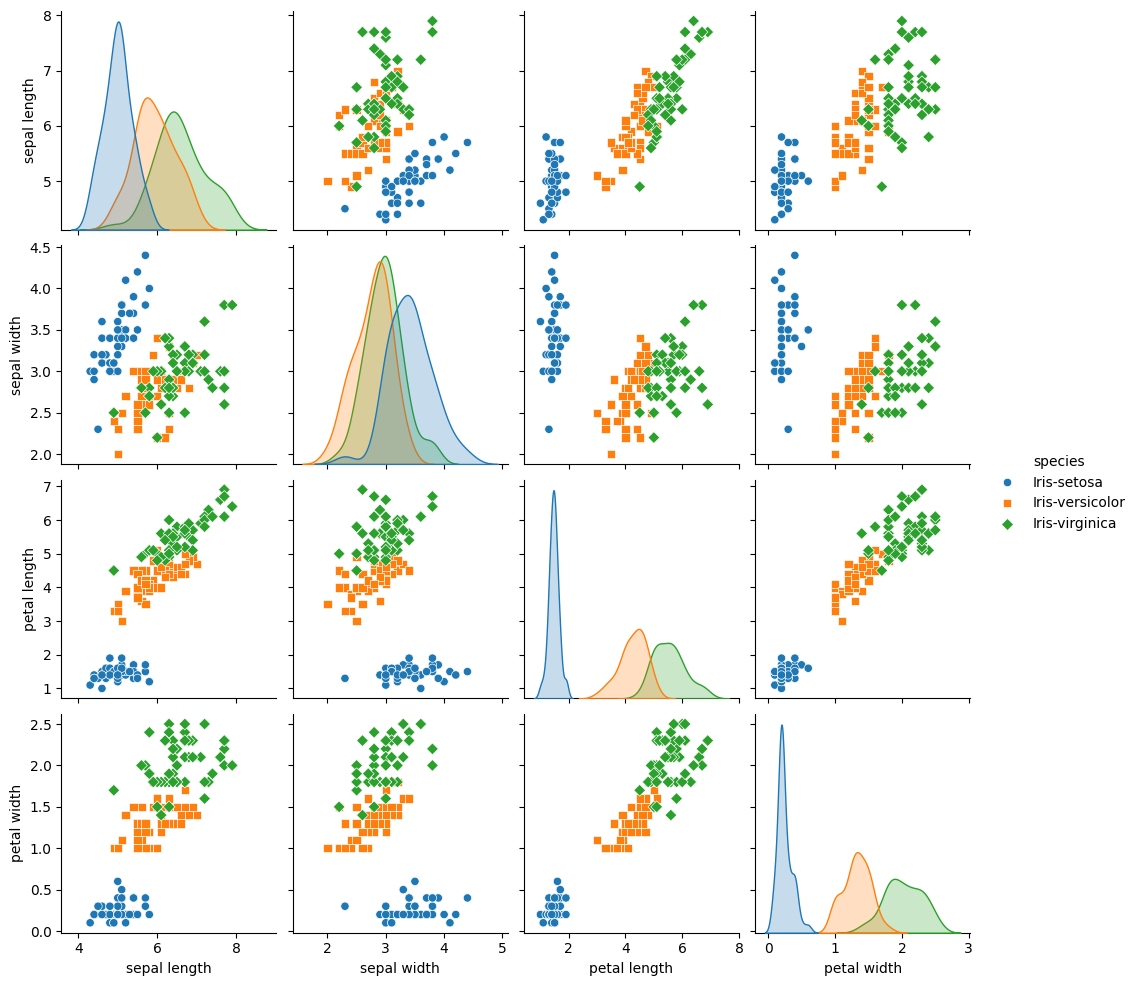

In [26]:
if y.columns != ['species']:
    y.columns = ['species']

full_data = pd.concat([X, y], axis=1)

# Plot the pairplot
sns.pairplot(full_data, hue='species', markers=["o", "s", "D"])
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

# Preparando datos para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train.values.ravel())

# Evaluación de desempeño para los datos de entrenamiento
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicción y evaluación en el conjunto de entrenamiento
train_predictions = model.predict(X_train)
print('Accuracy Score on training data: ', accuracy_score(y_train, train_predictions))
print('\n\nClassification Report for Training Data:')
print(classification_report(y_train, train_predictions))
print('\nConfusion Matrix for Training Data:')
print(confusion_matrix(y_train, train_predictions))

# Predicción y evaluación en el conjunto de prueba
test_predictions = model.predict(X_test)
print('\n\nAccuracy Score on testing data: ', accuracy_score(y_test, test_predictions))
print('\n\nClassification Report for Testing Data:')
print(classification_report(y_test, test_predictions))
print('\nConfusion Matrix for Testing Data:')
print(confusion_matrix(y_test, test_predictions))

Accuracy Score on training data:  0.95


Classification Report for Training Data:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.93      0.93      0.93        41
 Iris-virginica       0.92      0.92      0.92        39

       accuracy                           0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120


Confusion Matrix for Training Data:
[[40  0  0]
 [ 0 38  3]
 [ 0  3 36]]


Accuracy Score on testing data:  1.0


Classification Report for Testing Data:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg  